# REGRESSION MODEL TO PREDICT HOUSE PRICES IN KING COUNTY AREA (KC)

This regression analysis is part of end of Phase2 assessment which involves the analysis of King County
(KC) House Prices

### Business Understanding

In the housing market, the understanding of factors that affect house prices is fundamental for 
construction companies and real estate investors. These investors need to understand what drives house 
prices up so as to ensure that they invest in the kind of homes that would fetch higher prices and ensure
higher returns for their investments. In this analysis, I create a regression analysis model that is focused on the KC area
that would predict house prices for homes in the area depending on the most relevant features that
affect home prices and therefore provide a confident model for real estate investors and construction companies to determine their potential returns.

### Data Understanding

The dataset used in this analysis is the KC housing data set which contains data for 21597 properties in KC and 21 variables.
We will perform a multiple linear regression and find the relationship between the predictor variables
and the target variable (price). The analysis will help determine which variables impact the price
significantly and hence provide knowledge for real estate investors on what features to invest on in
the real estate market. The first step is to clean the dataset and prepare it for analysis. This will involve tackling the missing
values.

#### Import modules

In [1]:
#importing relevant dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

#### Loading Dataset

In [2]:
#loading the kc dataset file
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Data Cleaning

In [3]:
#exploring data to find any missing values in the dataframe
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns: waterfront, yr_renovated and view have missing values;2376, 3842 and 43 respectively that need to be addressed.

In [4]:
#identifying the different unique categories in the waterfront column
df.waterfront.unique()

array([nan,  0.,  1.])

In [5]:
#replacing null values with zeros in the waterfront column
df["waterfront"].fillna(0, inplace=True)
df.waterfront.unique()

array([0., 1.])

In [6]:
#exploring the different elements in the yr_renovated column
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

The yr_renovated column also has values of zero which there are houses that have not be renovated. Hence I will convert missing values to zero as well.

In [7]:
#replacing null values with zeros in the yr_renovated column
df["yr_renovated"].fillna(0, inplace=True)

In [8]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [9]:
#replaced missing values in view column with modal value
df["view"].fillna(df.view.mode(), inplace=True)

### Data Preparation

#### Exploratory Data Analysis (EDA)

In [10]:
#exploring the data's shape
df.shape

(21597, 21)

The dataset has 21597 rows and 21 columns which means 21597 homes with 21 features of those homes explored.

The dependent variable is price while the rest are independent variables. We will explore which of these features make sense to our real world problem.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There are 8 float data types, 11 integer data types and two object types. The sqft basement needs to be converted to a numerical datatype.


There are no null or missing values in the dataset

In [12]:
#changing column datatype to numerical type
df["sqft_basement"] = pd.to_numeric(df.sqft_basement, errors='coerce')

df["sqft_basement"].dtype

dtype('float64')

In [13]:
#checking the statistics of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


1. From the describe function, we can infer from bedrooms column the that there is a house 
with 33 bedrooms and this would be an interesting aspect to explore. The lowest number of bedrooms is 1.

2. The minimum sqft_living is 370 and maximum is 13540 and hence this would be interesting to check    
as well.

3. There is also a large difference between the 75th quantile and max values for bedrooms, bathrooms,
and sqft_living. 
This observation shows that there may be presence of outliers in our dataset in these columns. 

Visualizing the target variable's distribution

Text(0.5, 1.0, 'Distribution of house prices in KC')

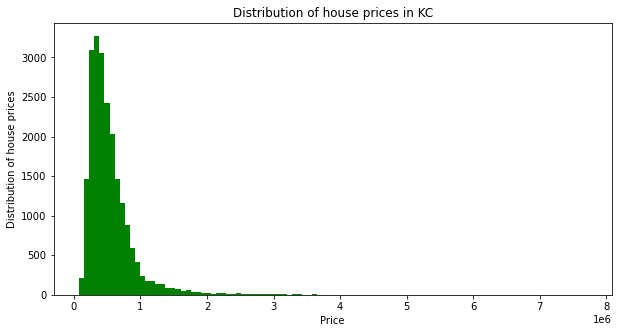

In [14]:
#exploring the dependent variable, price
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df.price, bins=100, color = "g")
ax.set_xlabel("Price")
ax.set_ylabel("Distribution of house prices")
ax.set_title("Distribution of house prices in KC")

Price which is the dependent variable is a continous variable with a distribution that is positively
skewed. This means that more people in this population prefer low priced homes. The mean of home prices is higher than the median and mode.


This is important to know because investors want to know how home buyers spend, if majority of them buy homes for lower prices, this would inform their decision-making on pricing when they are investing in new homes.

we are going to use standard deviation formula to remove outliers from the price column. I chose to use 2 standard deviations from the mean because that is what fit the price distribution to achieve a 
relatively normal distribution, using 3 standard deviations did not achieve an outcome of relatively normal distribution for this variable.

In [15]:
#removing outliers
upper_limit = df.price.mean() + 2*df.price.std()
lower_limit = df.price.mean() - 2*df.price.std()

In [16]:
#removing outliers in the price column by creating an upper and lower limit ranger
df1 = df[(df.price < upper_limit) & (df.price > lower_limit)]

Text(0.5, 1.0, 'distribution of house prices in KC')

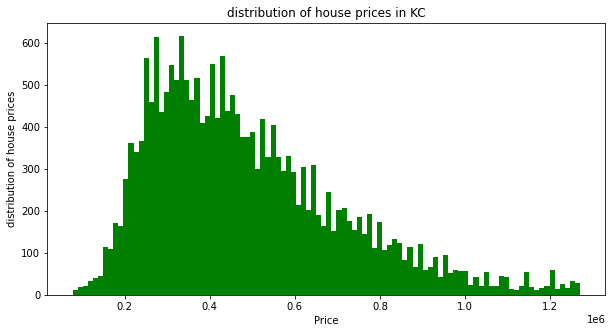

In [17]:
#checking to see if the distribution has normalized
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df1.price, bins=100, color = "g")
ax.set_xlabel("Price")
ax.set_ylabel("distribution of house prices")
ax.set_title("distribution of house prices in KC")

The distribution is relatively normal after the removal of the outliers but we can see still that it has a tail on the left that can be minimized later on in the preprocessing stage through log tranformation.

>We can explore the distribution of the bedrooms and bathrooms to see the most common design types
that would help the investors make an informed decision on what number of bedrooms and bathrooms that the homes they invest in would be most popular in this demographic.

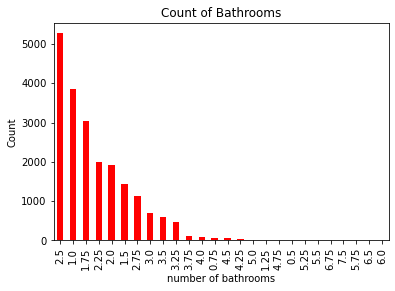

In [19]:
# plotting a bar graph for the count of bathrooms
df1["bathrooms"].value_counts().plot(kind="bar", color = "r")
plt.xlabel("number of bathrooms")
plt.ylabel("Count")
plt.title("Count of Bathrooms")
plt.savefig('bedrooms.png')

The plot shows that 2.5 bathroom houses are sold more than other kinds of houses followed by 1 bathroom houses. This tells the real estate investors to build more homes with 2.5 bathrooms and less homes that have more than 3 bathrooms.

Text(0.5, 1.0, 'Count of Bedrooms')

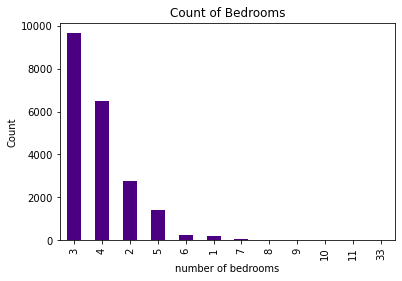

In [20]:
# plotting a bar graph for count of bedrooms
df1["bedrooms"].value_counts().plot(kind="bar", color = "indigo")
plt.xlabel("number of bedrooms")
plt.ylabel("Count")
plt.title("Count of Bedrooms")

Again we can see that 3 bedroom houses are the most sold in this area followed by 4 bedroom houses.

More than 7 bedroom houses and 1 bedroom houses are the least popular.
Investors would therefore be wise to build 3 bedroom houses and avoid 1 bedroom houses and those houses with more than 7 bedrooms.

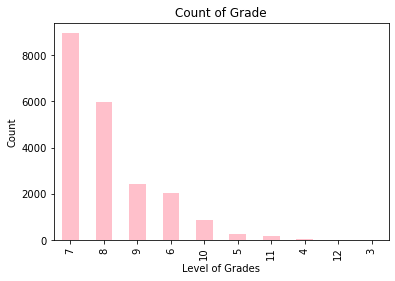

In [21]:
# plotting a bar graph for count of bedrooms
df1["grade"].value_counts().plot(kind="bar", color = "pink")
plt.xlabel("Level of Grades")
plt.ylabel("Count")
plt.title("Count of Grade")
plt.savefig('Grade.png')

We can see that houses are the most sold in this area are those with grade 7 followed by grade 8.

Houses with grade 11, 4 and 12 are the least popular. 
Investors would therefore be wise to have their houses get a grade 7 to ensure higher sales.

##### Outlier Removal

In [22]:
#exploring potential columns with outliers
columns = ["price", "bedrooms", "bathrooms", "sqft_living"]

Using boxplots to checkout outliers in this dataframe

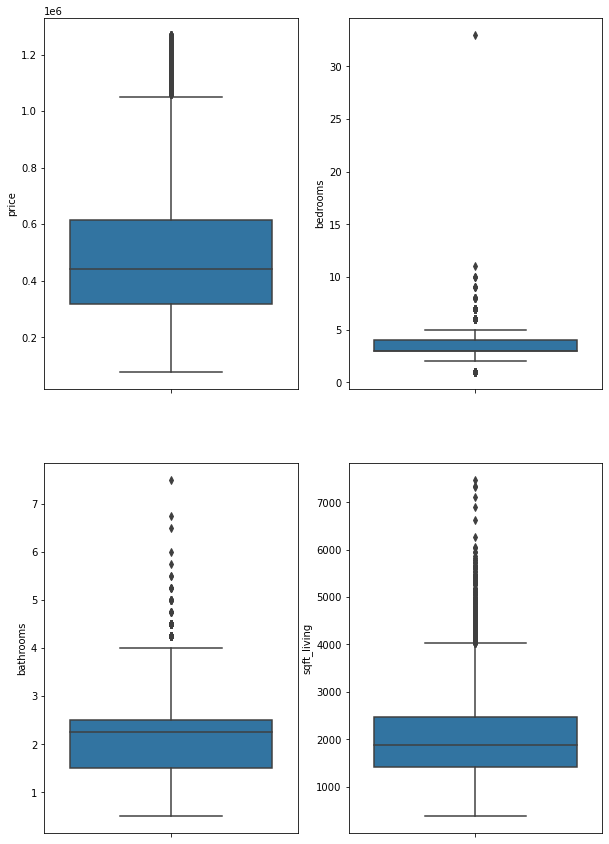

In [23]:
#creating boxplots
fig, ax = plt.subplots (ncols = 2, nrows = 2, figsize = (10, 15))
index = 0
ax = ax.flatten()

for col in df1[columns]:
    sns.boxplot(y = col, data = df1, ax=ax[index])
    index += 1


Bedrooms, sqft_living and bathrooms seem to have outliers that have to be dealt with. We used standard deviation formula but chose 2 standard deviations for bedrooms as 3 standard deviations was not very effective in reducing outliers

In [24]:
#removing outliers in bedrooms,bathrooms and sqft_living
upper_limit = df1.bedrooms.mean() + 2*df1.bedrooms.std()
lower_limit = df1.bedrooms.mean() - 2*df1.bedrooms.std()
df1 = df1[(df1.bedrooms < upper_limit) & (df1.bedrooms > lower_limit)]

In [25]:
# removing bedroom outliers
upper_limit = df1.bathrooms.mean() + 3*df1.bathrooms.std()
lower_limit = df1.bathrooms.mean() - 3*df1.bathrooms.std()
df1 = df1[(df1.bathrooms < upper_limit) & (df1.bathrooms > lower_limit)]

In [26]:
upper_limit = df1.sqft_living.mean() + 3*df1.sqft_living.std()
lower_limit = df1.sqft_living.mean() - 3*df1.sqft_living.std()
df1 = df1[(df1.sqft_living < upper_limit) & (df1.sqft_living > lower_limit)]

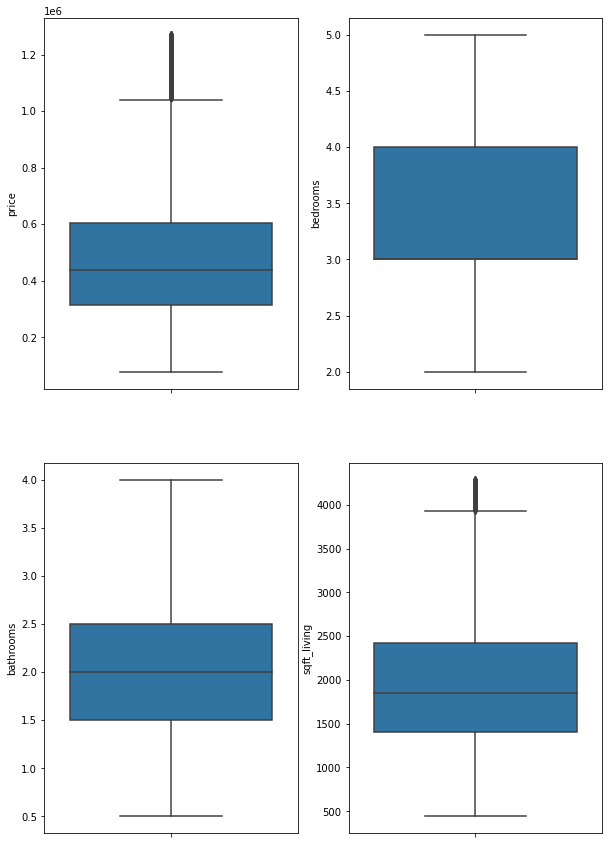

In [27]:
#checking to see if the outliers are still present
fig, ax = plt.subplots (ncols = 2, nrows = 2, figsize = (10, 15))
index = 0
ax = ax.flatten()

for col in df1[columns]:
    sns.boxplot(y = col, data = df1, ax=ax[index])
    index += 1

The boxplots show that we were successful in removing outliers from these columns.

>Identifying Correlated Features

Figuring out the most correlated factors(features) to price 

In [28]:
#correlation formula
df1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.009341,0.013080,0.027643,0.011807,-0.130735,0.031210,0.003260,0.025681,-0.025659,0.032684,0.015313,-0.005099,0.028931,-0.011132,-0.007570,0.001220,0.022591,0.013532,-0.142943
price,0.009341,1.000000,0.286747,0.440696,0.619527,0.078357,0.264755,0.068868,0.259685,0.042985,0.632281,0.517373,0.227247,0.041674,0.089368,-0.012467,0.425948,0.050187,0.560580,0.068722
bedrooms,0.013080,0.286747,1.000000,0.476905,0.591788,0.022472,0.155700,-0.030389,0.033986,0.021506,0.328463,0.471349,0.255810,0.173692,-0.005326,-0.163760,-0.041336,0.161652,0.399291,0.021140
bathrooms,0.027643,0.440696,0.476905,1.000000,0.700549,0.052712,0.508457,-0.006108,0.091784,-0.141682,0.611632,0.619460,0.194031,0.554218,0.019420,-0.208316,-0.005417,0.249425,0.523996,0.053042
sqft_living,0.011807,0.619527,0.591788,0.700549,1.000000,0.142977,0.338515,0.005387,0.168324,-0.072743,0.706306,0.847190,0.343895,0.350899,0.022057,-0.204680,0.018607,0.283122,0.743045,0.158438
sqft_lot,-0.130735,0.078357,0.022472,0.052712,0.142977,1.000000,-0.024578,0.025482,0.072972,-0.006098,0.081175,0.152489,-0.007008,0.038486,0.009903,-0.126136,-0.095321,0.217525,0.134482,0.696307
floors,0.031210,0.264755,0.155700,0.508457,0.338515,-0.024578,1.000000,-0.004922,-0.014933,-0.278121,0.455023,0.528993,-0.311713,0.508569,-0.006423,-0.060669,0.038928,0.129821,0.260410,-0.030808
waterfront,0.003260,0.068868,-0.030389,-0.006108,0.005387,0.025482,-0.004922,1.000000,0.283063,0.008034,-0.003706,-0.008692,0.027276,-0.035321,0.062882,0.046336,-0.036891,-0.053296,0.011489,0.035275
view,0.025681,0.259685,0.033986,0.091784,0.168324,0.072972,-0.014933,0.283063,1.000000,0.038058,0.137920,0.062502,0.200554,-0.073612,0.066034,0.102329,-0.019178,-0.083671,0.191332,0.072053
condition,-0.025659,0.042985,0.021506,-0.141682,-0.072743,-0.006098,-0.278121,0.008034,0.038058,1.000000,-0.172726,-0.182732,0.186420,-0.363597,-0.053427,-0.001109,-0.015810,-0.105115,-0.116020,-0.000785


<AxesSubplot:>

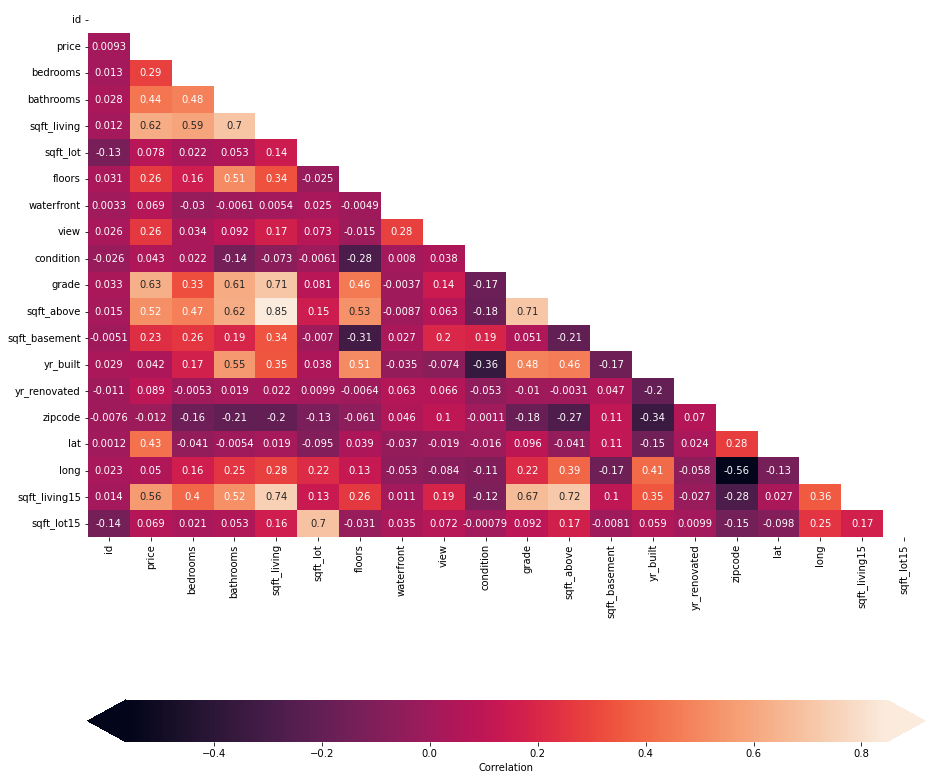

In [29]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax, annot=True,  
        cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})


Correlation above 0.6 indicates high correlation. Some of the variables with high correlation to price include sqft_living and grade. An increase in these factors lead to a higher price.These factors have a strong positive correlation to price.

Correlation between 0.50-0.60 is considered moderate correlation. Some of the variables with moderate correlation to price include; sqft_above and sqft_living15.

Low correlation varies between 0.3 to 0.5 and some of the features with low correlation include; latitide and bathrooms. 

Aspects such as floor, bedrooms, view and size of the basement show a low correlation to price as well and hence indicate that these aspects do not command a higher price amongst buyers in KC.

The least correlated features to price are sqft_lot15, longitude, zipcode, yr_built, yr_renovated condition, waterview and sqft_lot. These features have less than 0.1 correlation. This means buyers are not concerned with zipcode, lot sizes, condition of the house or when it was built or renovated when deciding prices. Despite their low correlation value, dropping them might not increase the predictive performace of the model and hence we will leave then in the model for now.


Plotting the most correlated features against price

Sqft_liv against price

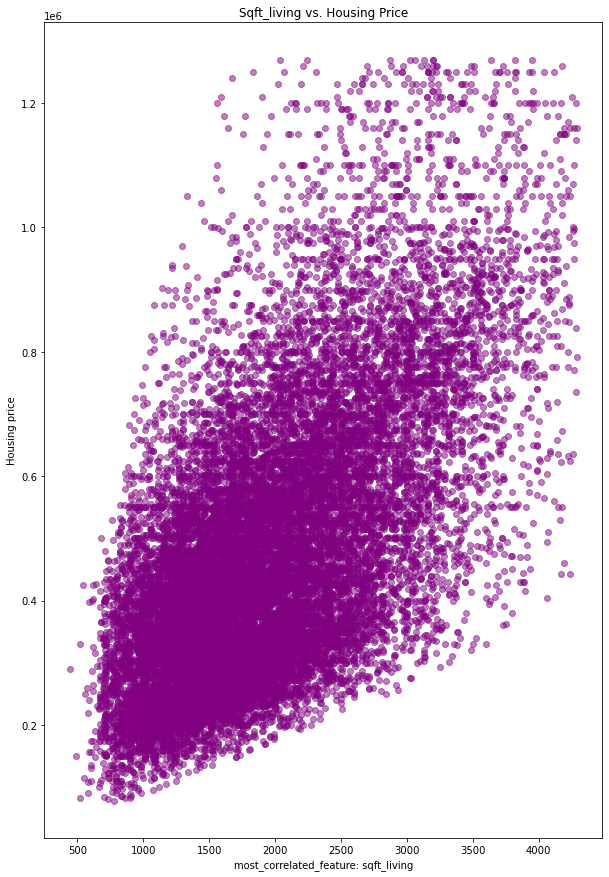

In [30]:
fig, ax = plt.subplots(figsize = [10, 15])

ax.scatter(df1["sqft_living"], df1.price, alpha=0.5, color = "purple")
ax.set_xlabel("most_correlated_feature: sqft_living")
ax.set_ylabel("Housing price")
ax.set_title("Sqft_living vs. Housing Price");
plt.savefig('sfqt_living.png')

There is a high correlation between sqft_living and price.

#### Pre-Processing

In [31]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Dropping the id and date columns because they do not affect my model and information needed by real estate investors
for this particular analysis

In [32]:
# #dropping the two mentioned columns(id) from the dataset
df1.drop(["id"], axis = 1, inplace = True)

Creating a new column, Age, that would show the age of the home and hence would be
important in the model as investors would like to see whether the age of the home
affects the price of home

In [33]:
#Splitting the date column to 2 columns for month and year
date = df1['date'].str.split('/', expand=True)
df1['month_sold'] = date[0].astype('int')
df1['year_sold'] = date[2].astype('int')
#Drop original date column
df1.drop(columns=['date'], axis=1, inplace=True)

In [34]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


In [35]:
#creating the column 'age' of houses in the dataframe
df1["age"] = df1["year_sold"]- df1["yr_built"] 

In [36]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28


In [37]:
categoricals = ["waterfront", "view"]

Dealing with categorical variables by creating dummies. We will transform grade since the other categorical variables such as view, waterfront and floor have a relatively weak relationship with price and therefore might not be fitted in the final model.

In [38]:
#getting dummies for the categorical features
water_dummies = pd.get_dummies(df1["waterfront"], prefix= "water", drop_first=True)
view_dummies = pd.get_dummies(df1["view"], prefix= "view", drop_first=True)
# con_dummies = pd.get_dummies(df1["condition"], prefix= "con", drop_first=True)



df1 = df1.drop(["waterfront", "view"], axis=1)

df1 = pd.concat([df1, water_dummies, view_dummies], axis=1)

df1.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,...,sqft_living15,sqft_lot15,month_sold,year_sold,age,water_1.0,view_1.0,view_2.0,view_3.0,view_4.0
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,...,1340,5650,10,2014,59,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,...,1690,7639,12,2014,63,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,...,2720,8062,2,2015,82,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,...,1360,5000,12,2014,49,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,...,1800,7503,2,2015,28,0,0,0,0,0


Before fitting our model, we have to see how the features are related to each other

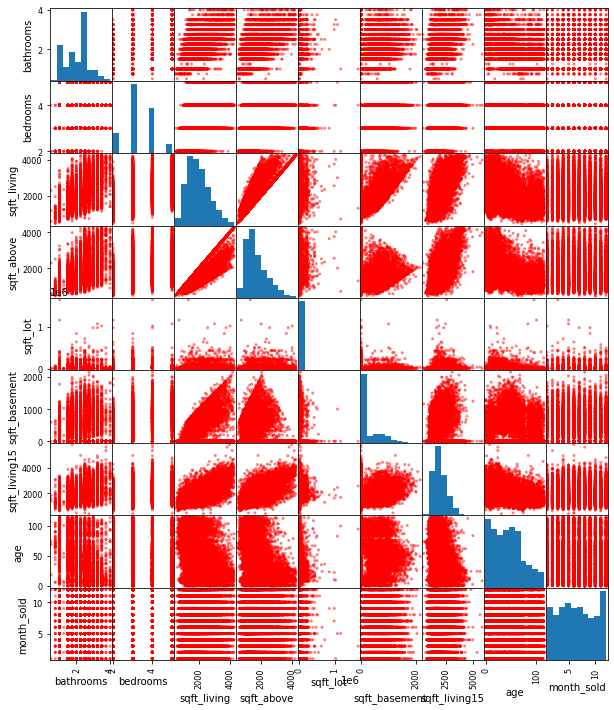

In [39]:
x_cols = ["bathrooms", "bedrooms", "sqft_living", "sqft_above", "sqft_lot", 
          "sqft_basement", "sqft_living15", "age", "month_sold"]
pd.plotting.scatter_matrix(df1[x_cols], figsize=(10,12), color = "red");

The variables sqft_above, sqft_living, and sqft_living15 are highly correlated with each other. 


We can check which of these variables has a correlation of above 0.75 so as to address multicollinearity

In [40]:
#creating a dataframe with only the predictor variables
df_pred = df1[x_cols]
df_pred.head()

,bathrooms,bedrooms,sqft_living,sqft_above,sqft_lot,sqft_basement,sqft_living15,age,month_sold
0,1.00,3,1180,1180,5650,0.0,1340,59,10
1,2.25,3,2570,2170,7242,400.0,1690,63,12
2,1.00,2,770,770,10000,0.0,2720,82,2
3,3.00,4,1960,1050,5000,910.0,1360,49,12
4,2.00,3,1680,1680,8080,0.0,1800,28,2


In [41]:
df2=df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df2['pairs'] = list(zip(df2.level_0, df2.level_1))
df2.set_index(['pairs'], inplace = True)
df2.drop(columns=['level_1', 'level_0'], inplace = True)
df2.columns = ['cc']
df2.drop_duplicates(inplace=True)

#the cut-off of 0.75 is used because a correlation btwn 0.70-0.80 and above is considered high
df2[(df2.cc>.75) & (df2.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.84719


There seems to be only two features that have a high correlation of above 0.8 and therefore one has
to be dropped. Since sqft_living has a higher correlation with the dependent variable price, I will drop
sqft_above.

In [42]:
df1.drop(["sqft_above"], axis = 1, inplace = True)

In [43]:
#dropping sqft_basement because of many null values
df1.drop(["sqft_basement"], axis = 1, inplace = True)

In [44]:
#dropping these features because they have low correlation to price and would not be useful in solving real world problem

df1.drop(["zipcode", "yr_built", "yr_renovated"], axis = 1, inplace = True)

Furthermore, yr_built and yr_renovated are not necessary if we have the age of the home 
in the dataset

We can also use histograms to check the normality of the features we removed outliers from

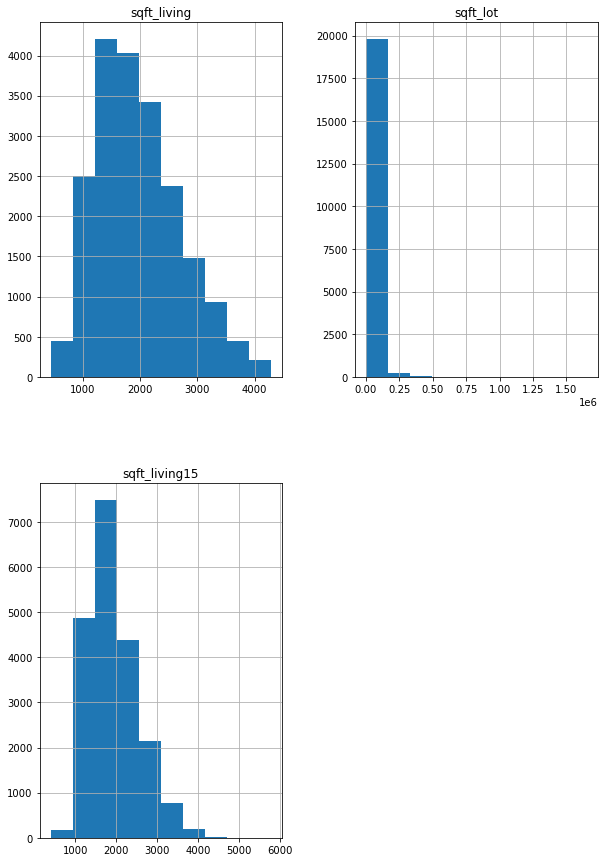

In [45]:
new_x_cols = ["sqft_living", "sqft_lot", "sqft_living15"]
df1[new_x_cols].hist(figsize  = [10, 15]); 
# fig, ax = plt.subplots (ncols = 2, nrows = 2, figsize = (10, 15))

The figures above show that just like the dependent variable price, these features do not have a perfectly normal
distribution.

Therefore, we are going to apply log transformation and feature scaling before modelling.

In [46]:
# log transformation to deal with outliers in the variables
data_log = pd.DataFrame([])
data_log['sqft_living15'] = np.log(df1['sqft_living15'])
data_log['sqft_lot'] = np.log(df1['sqft_lot'])
data_log['sqft_lot15'] = np.log(df1['sqft_lot15'])
data_log['sqft_living'] = np.log(df1['sqft_living'])
data_log['price'] = np.log(df1['price'])

#creating logname variables
logliv = data_log['sqft_living'] 
logliv15 = data_log['sqft_living15']
loglot = data_log['sqft_lot']
loglot15 = data_log['sqft_lot15']
logprice = data_log['price']


# performing feature scaling 
scaled_price = (logprice - np.mean(logprice)) / np.sqrt(np.var(logprice))
scaled_liv = (logliv - np.mean(logliv)) / np.sqrt(np.var(logliv))
scaled_lot = (loglot - np.mean(loglot)) / np.sqrt(np.var(loglot))
scaled_lot15 = (loglot - np.mean(loglot15)) / np.sqrt(np.var(loglot15))
scaled_liv15 = (logliv15 - np.mean(logliv15)) / np.sqrt(np.var(logliv15))



#creating a dataframe for new the newly scaled features
data_cont_scaled = pd.DataFrame([])
data_cont_scaled['liv'] = scaled_liv
data_cont_scaled['liv15'] = scaled_liv15
data_cont_scaled['lot'] = scaled_lot
data_cont_scaled['lot15'] = scaled_lot15
data_cont_scaled['price'] = scaled_price



We have transformed the variables and minimized the effects of the outliers 

In [47]:
#dropping the scaled features
df1.drop(["sqft_lot", "sqft_living", "sqft_living15", "price", "sqft_lot15"], axis = 1, inplace = True)

In [48]:
#merging the two dataframes contained scaled features and df1
df1 = pd.concat([df1, data_cont_scaled], axis = 1)
df1.head()

,bedrooms,bathrooms,floors,condition,grade,lat,long,month_sold,year_sold,age,water_1.0,view_1.0,view_2.0,view_3.0,view_4.0,liv,liv15,lot,lot15,price
0,3,1.00,1.0,3,7,47.5112,-122.257,10,2014,59,0,0,0,0,0,-1.149228,-1.021026,-0.357398,-0.366415,-1.497598
1,3,2.25,2.0,3,7,47.7210,-122.319,12,2014,63,0,0,0,0,0,0.889617,-0.267246,-0.076875,-0.056029,0.463511
2,2,1.00,1.0,3,6,47.7379,-122.233,2,2015,82,0,0,0,0,0,-2.267356,1.278596,0.287775,0.347440,-1.960997
3,4,3.00,1.0,5,7,47.5208,-122.393,12,2014,49,0,0,0,0,0,0.179886,-0.972903,-0.495508,-0.519229,0.719747
4,3,2.00,1.0,3,8,47.6168,-122.045,2,2015,28,0,0,0,0,0,-0.223882,-0.062419,0.046858,0.080876,0.345158


In [49]:
#drop  year_sold and longitude because it does not serve the model
df1.drop(["year_sold", "long"], axis = 1, inplace = True)

The dataframe has been cleaned and the relevant features selected ready for modelling

### Modeling

The independent features include every variable expect price

In [50]:
#defining the dependent variable y
y = df1.price
y.head()

0   -1.497598
1    0.463511
2   -1.960997
3    0.719747
4    0.345158
Name: price, dtype: float64

In [51]:
# #defining our independent variables
X = df1.drop("price", axis = 1)
X.head()

,bedrooms,bathrooms,floors,condition,grade,lat,month_sold,age,water_1.0,view_1.0,view_2.0,view_3.0,view_4.0,liv,liv15,lot,lot15
0,3,1.00,1.0,3,7,47.5112,10,59,0,0,0,0,0,-1.149228,-1.021026,-0.357398,-0.366415
1,3,2.25,2.0,3,7,47.7210,12,63,0,0,0,0,0,0.889617,-0.267246,-0.076875,-0.056029
2,2,1.00,1.0,3,6,47.7379,2,82,0,0,0,0,0,-2.267356,1.278596,0.287775,0.347440
3,4,3.00,1.0,5,7,47.5208,12,49,0,0,0,0,0,0.179886,-0.972903,-0.495508,-0.519229
4,3,2.00,1.0,3,8,47.6168,2,28,0,0,0,0,0,-0.223882,-0.062419,0.046858,0.080876


The next step is splitting the variables into train and test groups to allow for us to fit the model
with the training dataset and test it after fitting with the test dataset.

The random state has to be indicated for reproducibility of results.

#### First Model

In [52]:
#creating train and test split datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [53]:
#viewing model summary using statsmodel

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     2603.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:33:48   Log-Likelihood:                -12532.
No. Observations:               16031   AIC:                         2.510e+04
Df Residuals:                   16014   BIC:                         2.523e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -141.8657      1.490    -95.239      0.000    -144.785    -138.946
bedrooms      -0.0662      0.007     -9.504      0.000      -0.080      -0.053
bathrooms      0.1226      0.011     11.601      0.000       0.102       0.143
floors         0.1453      0.010     13.930      0.000       0.125       0.166
condition      0.1326      0.007     18.701      0.000       0.119       0.147
grade          0.3303      0.007     50.259      0.000       0.317       0.343
lat            2.9108      0.031     92.511      0.000       2.849       2.972
month_sold    -0.0096      0.001     -7.168      0.000      -0.012      -0.007
age            0.0078      0.000     38.023      0.000       0.007       0.008
water_1.0      0.7258      0.090      8.064      0.000       0.549       0.902
view_1.0       0.2978      0.035      8.433      0.000       0.229       0.367
view_2.0       0.2683      0.022     12.279      0.000       0.226       0.311
view_3.0       0.3730      0.033     11.386      0.000       0.309       0.437
view_4.0       0.5912      0.053     11.209      0.000       0.488       0.695
liv            0.2889      0.009     32.726      0.000       0.272       0.306
liv15          0.1476      0.007     22.285      0.000       0.135       0.161
lot            2.0340      0.022     92.213      0.000       1.991       2.077
lot15         -1.8678      0.019    -97.664      0.000      -1.905      -1.830
==============================================================================
Omnibus:                      216.396   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.515
Skew:                          -0.046   Prob(JB):                     2.15e-86
Kurtosis:                       3.763   Cond. No.                     1.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.7173844699302483

Our first model produced an Rsquared of 72% and regression score of 72% but we want to see if it
can be improved through a few iterations.

#### Model 2 (removing insignificant features)

For the next iteration, we will drop the lot15 column because it is one of the features with the lowest
correlation to price and is therefore insignificant

In [55]:
X_train.drop(["lot15"], axis = 1, inplace = True)

In [56]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     2603.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:33:49   Log-Likelihood:                -12532.
No. Observations:               16031   AIC:                         2.510e+04
Df Residuals:                   16014   BIC:                         2.523e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -141.9200      1.490    -95.240      0.000    -144.841    -138.999
bedrooms      -0.0662      0.007     -9.504      0.000      -0.080      -0.053
bathrooms      0.1226      0.011     11.601      0.000       0.102       0.143
floors         0.1453      0.010     13.930      0.000       0.125       0.166
condition      0.1326      0.007     18.701      0.000       0.119       0.147
grade          0.3303      0.007     50.259      0.000       0.317       0.343
lat            2.9108      0.031     92.511      0.000       2.849       2.972
month_sold    -0.0096      0.001     -7.168      0.000      -0.012      -0.007
age            0.0078      0.000     38.023      0.000       0.007       0.008
water_1.0      0.7258      0.090      8.064      0.000       0.549       0.902
view_1.0       0.2978      0.035      8.433      0.000       0.229       0.367
view_2.0       0.2683      0.022     12.279      0.000       0.226       0.311
view_3.0       0.3730      0.033     11.386      0.000       0.309       0.437
view_4.0       0.5912      0.053     11.209      0.000       0.488       0.695
liv            0.2889      0.009     32.726      0.000       0.272       0.306
liv15          0.1476      0.007     22.285      0.000       0.135       0.161
lot           -0.0327      0.005     -6.434      0.000      -0.043      -0.023
==============================================================================
Omnibus:                      216.396   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.515
Skew:                          -0.046   Prob(JB):                     2.15e-86
Kurtosis:                       3.763   Cond. No.                     2.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Rsquared has stayed the same at 0.722 even after dropping lot

#### model 3 

Although bedrooms, lot and month_sold have a low positive correlation with price, their coefficients in the summary are negative
and therefore, since we want the model to be easily interpretable, we will drop these columns from the model to make it easier to read and interpret our model.


In [57]:
#dropping bedrooms, lot and month_sold columns
X_train.drop(["bedrooms", "lot", "month_sold"], axis = 1, inplace=True)

In [58]:
final_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     3155.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:33:49   Log-Likelihood:                -12622.
No. Observations:               16031   AIC:                         2.527e+04
Df Residuals:                   16017   BIC:                         2.538e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -144.5462      1.468    -98.462      0.000    -147.424    -141.669
bathrooms      0.1209      0.010     11.581      0.000       0.100       0.141
floors         0.1712      0.010     17.316      0.000       0.152       0.191
condition      0.1298      0.007     18.214      0.000       0.116       0.144
grade          0.3384      0.007     51.633      0.000       0.326       0.351
lat            2.9583      0.031     95.213      0.000       2.897       3.019
age            0.0077      0.000     37.546      0.000       0.007       0.008
water_1.0      0.7184      0.090      7.953      0.000       0.541       0.895
view_1.0       0.3171      0.035      8.942      0.000       0.248       0.387
view_2.0       0.2809      0.022     12.796      0.000       0.238       0.324
view_3.0       0.3861      0.033     11.738      0.000       0.322       0.451
view_4.0       0.6111      0.053     11.532      0.000       0.507       0.715
liv            0.2418      0.008     30.745      0.000       0.226       0.257
liv15          0.1392      0.006     21.427      0.000       0.126       0.152
==============================================================================
Omnibus:                      197.779   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.353
Skew:                          -0.051   Prob(JB):                     3.74e-76
Kurtosis:                       3.714   Cond. No.                     2.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Rsquared has leveled down to 72% after this third iteration after dropping bedrooms, month_sold
and sqft lot.

### Regression Results

A multiple regression analysis was conducted to see which features significantly predict the price 
of houses in King County. The results of analysis showed that 10 features or predictors explained 72%
of the variance (R2= 0.72, F=3155, p< 0.05). All the independent variables used here in the model were
significant features as they all had pvalues less than 0.05. After the iterations, model 3 was selected as the final model.

 
The final Regression Formula is

-144.5462 + 
sum(
 0.1209 * bathrooms
 
 0.1712 * floors
 
 0.1298 * condition
 
 0.3384 * grade
 
 2.9583 * lat
 
 0.0077 * age
 
 0.7184 * water_1.0
 
 0.3171 * view_1.0
 
 0.2809 * view_2.0
 
 0.3861 * view_3.0
 
 0.6111 * view_4.0
 
 0.2418 * sqft_living
 
 0.1392 * sqft_living15 
 )
                
Two of the independent variables with the strongest relationship to price are grade and sqft_living.
the coeffients of these variables are:

grade is 0.3384
Since the dependent variable is log transformed and grade is not, we have to exponentiate the feature 
and subtract 1.
(exp(0.3384) – 1) * 100 = 40.27

This means that a unit increase or improvement in grade leads to a price increase of 40%.



sqft_living  is 0.2418
This means that for every 1% increase in sqft_living square or the footage of the home, there is an
0.24% increase in price of the home. 
                  

#### Model Validation

In [59]:
from sklearn.metrics import mean_squared_error
X = df1.drop(["price", "lot15", "bedrooms", "lot", "month_sold"], axis=1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.2803391406528791
Test Mean Squared Error: 0.28599958883577314


There is not a great different between Train Mean Squared Error and Test Mean Squared Error therefore
we have not overfitted our model and it is okay. This means that our model will perform in a similar
way on different data.

### Conclusion

From the regression analysis conducted, the following observations were made:

The best predictors for home prices in King County are sqft_living, grade and bathrooms.

The model's findings sometimes go against real world assumptions such as bedrooms and
geographical locations being huge factors in influencing price. In this model findings
real estate investors can use use predictors such as sqft_living to determine price of future investments. 

This model however, cannot be applied in 
different geographical locations due to varying situations and differences across
different regions.

Additionally, although grade and bathrooms show high correlation with price, visualizations of their
count across the dataset showed variations in the bathrooms and grades with 2.5 bathrooms houses being the most sold houses and grade 7 houses being the most sold.

### Recommendations

1. For real estate investors, if they are looking to make money in the real estate market, you have to 
invest in homes that will achieve grade 7 in the King County area, meeting grading requirements for 
the region. This is the optimal grade level to sell more houses in the area.

2. Secondly, real estate investors have to invest well in the bathrooms with the optimal number of 2.5
to make a lot of returns. This is the optimal number of bedrooms to sell more houses in the area.

3. Lastly, although model shows the higher the sqft_living space, that is, a higher square footage of the home, the higher the prices. Data from the count of houses across the number of bathrooms and grade show that the King County population buys more averagely priced homes than highly priced homes. Real estate investors should therefore price their homes at average prices.